In [1]:
# Import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
# Load the dataset 
data = pd.read_csv("calories.csv")

In [3]:
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190,94,29,105,40.8,231
1,female,20,166,60,14,94,40.3,66
2,male,69,179,79,5,88,38.7,26
3,female,34,179,71,13,100,40.5,71
4,female,27,154,58,10,81,39.8,35


In [4]:
data.shape

(14989, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14989 entries, 0 to 14988
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      14989 non-null  object 
 1   Age         14989 non-null  int64  
 2   Height      14989 non-null  int64  
 3   Weight      14989 non-null  int64  
 4   Duration    14989 non-null  int64  
 5   Heart_Rate  14989 non-null  int64  
 6   Body_Temp   14989 non-null  float64
 7   Calories    14989 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 936.9+ KB


In [6]:
#checking the missing values
data.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

### Analyzing the Data

In [7]:
data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,14989.000000,14989.000000,14989.000000,14989.000000,14989.000000,14989.000000,14989.000000
mean,42.785843,174.459737,74.961972,15.529855,95.516646,40.025399,89.524451
std,16.977454,14.259245,15.035263,8.318430,9.581589,0.779225,62.439059
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14989 entries, 0 to 14988
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      14989 non-null  object 
 1   Age         14989 non-null  int64  
 2   Height      14989 non-null  int64  
 3   Weight      14989 non-null  int64  
 4   Duration    14989 non-null  int64  
 5   Heart_Rate  14989 non-null  int64  
 6   Body_Temp   14989 non-null  float64
 7   Calories    14989 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 936.9+ KB


### Data Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

In [10]:
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190,94,29,105,40.8,231
1,0,20,166,60,14,94,40.3,66
2,1,69,179,79,5,88,38.7,26
3,0,34,179,71,13,100,40.5,71
4,0,27,154,58,10,81,39.8,35


### Correlation of the data

In [11]:
correlation = data.corr()

<Axes: >

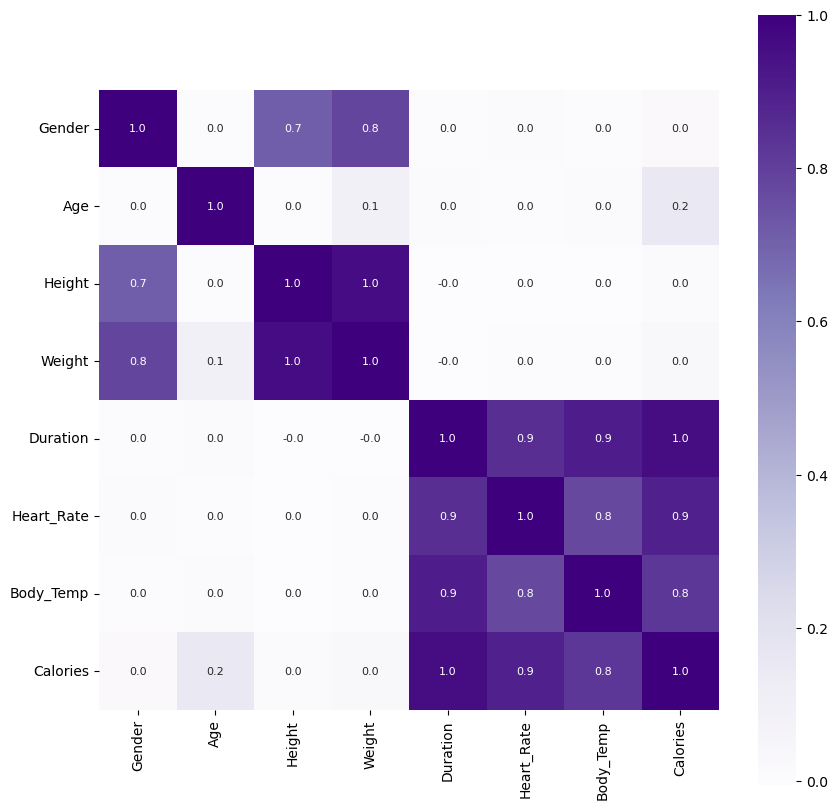

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Purples')

### Seperation of Feature Variable and Target Variable

In [13]:
# Separate target variable and feature set 
X = data.drop('Calories', axis=1) 
y = data['Calories']

In [14]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190,94,29,105,40.8
1,0,20,166,60,14,94,40.3
2,1,69,179,79,5,88,38.7
3,0,34,179,71,13,100,40.5
4,0,27,154,58,10,81,39.8
...,...,...,...,...,...,...,...
14984,0,20,193,86,11,92,40.4
14985,0,27,165,65,6,85,39.2
14986,0,43,159,58,16,90,40.1
14987,1,78,193,97,2,84,38.3


In [15]:
y

0        231
1         66
2         26
3         71
4         35
        ... 
14984     45
14985     23
14986     75
14987     11
14988     98
Name: Calories, Length: 14989, dtype: int64

### Split the data into training and testing data

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [17]:
print(X.shape,X_train.shape,X_test.shape)

(14989, 7) (11991, 7) (2998, 7)


### Model implementation

In [18]:
#loading the model
model = XGBRegressor()

In [19]:
#training the model with X_train
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [20]:
calories_burnt_prediction = model.predict(X_test)
print(calories_burnt_prediction)

[228.73135   54.488903  54.80019  ... 200.76027   11.693014  76.59835 ]


### Model Performance

In [21]:
MAE = metrics.mean_absolute_error(Y_test, calories_burnt_prediction)
MSE = metrics.mean_squared_error(Y_test, calories_burnt_prediction)
R2 = metrics.r2_score(Y_test, calories_burnt_prediction)

print("Mean Absolute Error = ",MAE)
print("Mean Squared Error:", MSE)
print("R² Score:", R2)

Mean Absolute Error =  1.4463250032458963
Mean Squared Error: 4.553387569213995
R² Score: 0.9988428079448981


<Figure size 800x500 with 0 Axes>

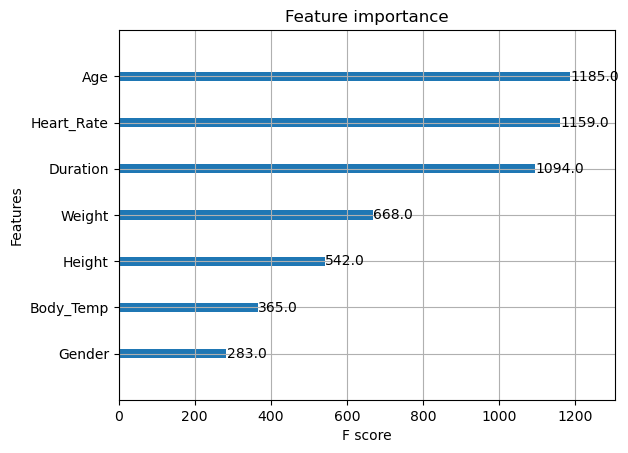

In [22]:
plt.figure(figsize=(8,5))
xgb.plot_importance(model)
plt.show()

### Predictive System

In [23]:
# Input data
input_data = (0,68,190,94,29,105,40.3)

# Convert to NumPy array and reshape
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

# Make prediction
prediction = model.predict(input_data_as_numpy_array)

# Display result
print("The predicted calories burnt for the given individual is:", round(prediction[0],2))

The predicted calories burnt for the given individual is: 191.7
